In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt


In [2]:
# Load your recorded "hello"
signal1, sr1 = librosa.load("audio_files/hello_me.m4a", sr=None)

# Load your friend's "hello"
signal2, sr2 = librosa.load("audio_files/hello_friend.m4a", sr=None)

print("Sample Rate 1:", sr1)
print("Sample Rate 2:", sr2)
print("Length Signal 1:", len(signal1))
print("Length Signal 2:", len(signal2))


Sample Rate 1: 48000
Sample Rate 2: 48000
Length Signal 1: 214976
Length Signal 2: 229312


/var/folders/f6/hysf9k395jn4nn5p8d6mr0d00000gn/T/ipykernel_8188/58967374.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  signal1, sr1 = librosa.load("audio_files/hello_me.m4a", sr=None)
/opt/miniconda3/envs/college-env/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/f6/hysf9k395jn4nn5p8d6mr0d00000gn/T/ipykernel_8188/58967374.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  signal2, sr2 = librosa.load("audio_files/hello_friend.m4a", sr=None)
/opt/miniconda3/envs/college-env/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


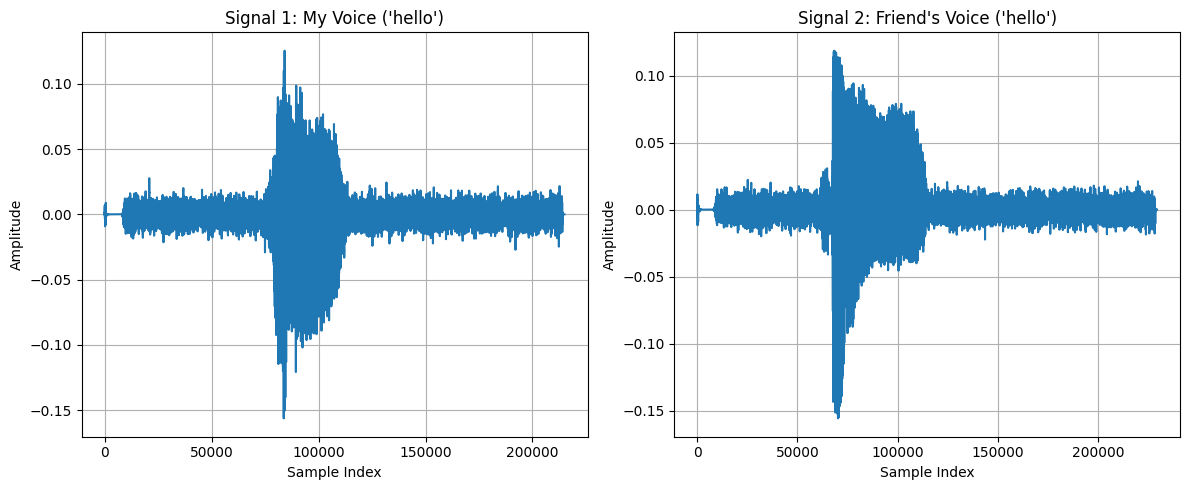

In [3]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(signal1)
plt.title("Signal 1: My Voice ('hello')")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(signal2)
plt.title("Signal 2: Friend's Voice ('hello')")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


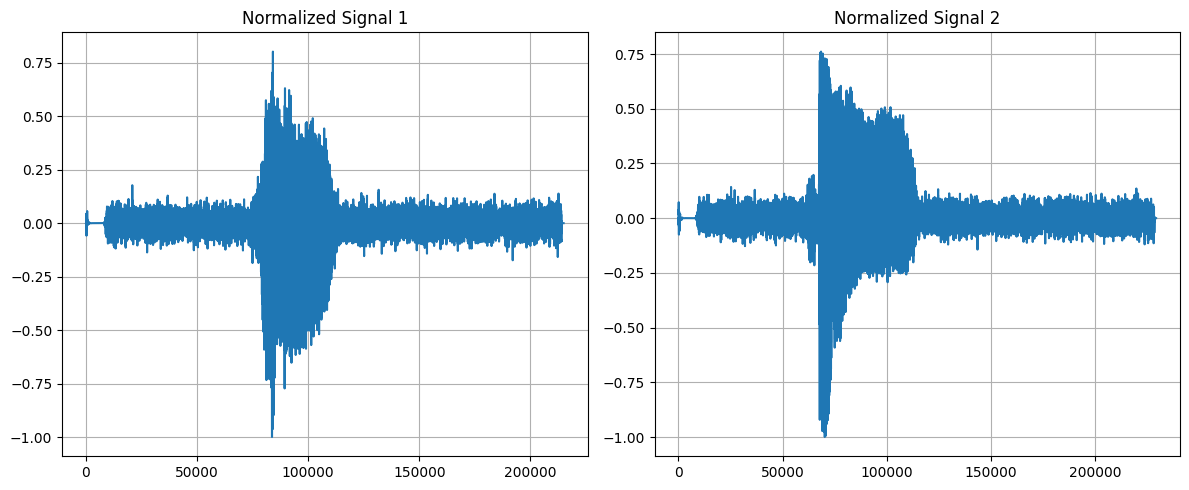

In [4]:
signal1_norm = signal1 / np.max(np.abs(signal1))
signal2_norm = signal2 / np.max(np.abs(signal2))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(signal1_norm)
plt.title("Normalized Signal 1")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(signal2_norm)
plt.title("Normalized Signal 2")
plt.grid(True)

plt.tight_layout()
plt.show()


In [5]:
def dtw(x, y):
    n = len(x)
    m = len(y)
    
    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(x[i-1] - y[j-1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i-1, j],     # insertion
                dtw_matrix[i, j-1],     # deletion
                dtw_matrix[i-1, j-1]    # match
            )
    
    return dtw_matrix


In [6]:
dtw_matrix = dtw(signal1_norm, signal2_norm)
dtw_matrix


: 